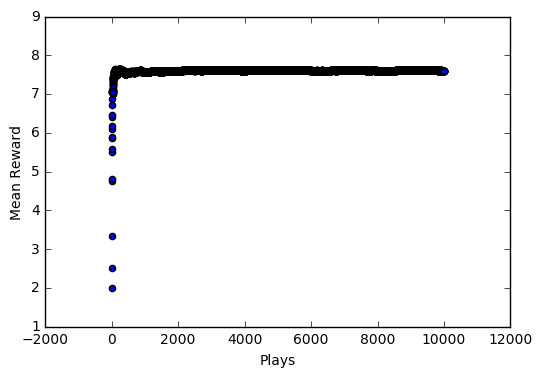

In [62]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt
%matplotlib inline

num_of_arms = 10
arms = np.random.rand(num_of_arms)
epsilon = 0.1

action_value_history = np.ones(num_of_arms) #stores history of action / values
count_actions = np.zeros(num_of_arms)       #counts the actions taken over time

def given_reward(probability):
    total_rewards = 0                       #counter for rewards
    for run_time in range(10):              #cycles in trying to increase total rewards
        if random.random() > probability:   #randomly assign a reward only if greater than the probability
            total_rewards += 1              #add a reward if randomly is greater than the probability
    return total_rewards                    #return the total rewards
    
def greatest_arm(action):
    return np.argmax(action)                #returns the best arm

plt.xlabel("Plays")
plt.ylabel("Mean Reward")

for i in range(100):
    if random.random() > epsilon:           #randomly use our history to make a prediction of where to go
       
        best_action_value_index = greatest_arm(action_value_history) #find the index of the best arm       
        count_actions[best_action_value_index] += 1 #adds 1 to the number of cycles        
        k_ = count_actions[best_action_value_index] #k is the place we are in history, i.e. the cycle number               
        best_arm_choice = arms[best_action_value_index] #actually chooses the arm        
        reward = given_reward(best_arm_choice) #give rewards to the best arm        
        old_average = action_value_history[best_action_value_index]        
        new_average = old_average + (1/k_)*(reward - old_average) #updates the running average       
        action_value_history[best_action_value_index] = new_average

    else:
        random_choice_index = np.where(action_value_history == np.random.choice(action_value_history))[0][0] #find the index of the best arm       
        count_actions[random_choice_index] += 1 #adds 1 to the number of cycles        
        k_ = count_actions[random_choice_index] #k is the place we are in history, i.e. the cycle number               
        best_arm_choice = arms[random_choice_index] #actually chooses the arm        
        reward = given_reward(best_arm_choice) #give rewards to the best arm        
        old_average = action_value_history[random_choice_index]        
        new_average = old_average + (1/k_)*(reward - old_average) #updates the running average       
        action_value_history[random_choice_index] = new_average
    runningMean = np.average(action_value_history, weights=np.array([count_actions[j]/np.sum(count_actions) for j in range(len(count_actions))]))
    
    plt.scatter(i, runningMean)    
    
    
    
    
    
    
    